### Machine Learning Project - **Alice DEVILDER**

# Twitter Climate Change Sentiment Analysis

This project focuses on the sentiment analysis of tweets related to climate change by building and comparing machine learning models to classify whether a person believes in climate change based on novel tweet data. 
The dataset used for this analysis was collected as part of a project funded by *a Canada Foundation for Innovation JELF Grant* awarded to **Chris Bauch** at the *University of Waterloo*.  
It corresponds to the [Twitter Climate Change Sentiment Dataset](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset) from Kaggle .

### Some context

Climate change remains a topic of significant global concern, prompting ongoing discussions and debates on social media platforms like Twitter. With the proliferation of climate-related content online, distinguishing between different perspectives and attitudes towards climate change is crucial for understanding public sentiment and informing policy decisions.

Twitter serves as a valuable source of real-time data reflecting diverse viewpoints on climate change, ranging from support for climate action to skepticism or denial of its existence. By leveraging machine learning techniques, this project aims to analyze and classify tweet sentiments to discern whether individuals express belief or disbelief in climate change.

In this dynamic digital landscape, the ability to accurately classify tweet sentiments offers valuable insights into public perceptions and attitudes towards climate change. By building and comparing machine learning models, this project seeks to enhance our understanding of the nuanced discourse surrounding climate change on social media platforms like Twitter.

### About Dataset

The dataset aggregates tweets pertaining to climate change collected between *April 27, 2015*, and *February 21, 2018*. A total of **43,943 tweets** were annotated for sentiment analysis. Each tweet is independently labelled by three reviewers, and only tweets where all three reviewers agreed on the sentiment are included in the dataset.

Each tweet is labelled with one of the following classes:

* **2 (News):** The tweet links to factual news about climate change.
* **1 (Pro):** The tweet supports the belief of man-made climate change.
* **0 (Neutral):** The tweet neither supports nor refutes the belief of man-made climate change.
* **-1 (Anti):** The tweet does not believe in man-made climate change.

Moreover, the dataset includes three columns:

**sentiment:** The sentiment label of the tweet.  
**message:** The text content of the tweet.  
**tweetid:** The unique identifier of the tweet.

### Project Objective

The project objective is to build and compare machine learning models to classify whether a person believes in climate change based on novel tweet data. By leveraging the dataset collected as part of the Canada Foundation for Innovation JELF Grant, the aim is to develop robust classification algorithms that accurately distinguish between different perspectives on climate change expressed in tweets. The project seeks to evaluate the performance of various machine learning techniques and identify the most effective model for sentiment analysis of climate change-related tweets on Twitter.

## Import librairies and dataset

In [38]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alice\AppData\Roaming\nltk_data...


We can first import the dataset and how it looks like.

In [2]:
df = pd.read_csv('twitter_sentiment_data.csv')

## 1. Data Cleansing 

Let's see how the dataset looks like using ```df.head(10)```.

In [3]:
df.head(10)

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153
5,0,Unamshow awache kujinga na iko global warming ...,793125429418815489
6,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125430236684289
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,793126558688878592
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,793127097854197761
9,1,#BeforeTheFlood Watch #BeforeTheFlood right he...,793127346106753028


Then we can also have some information about the dataset by calling ```df.info```, such as ncol, nrow, nbr missing values, dtypes.

In [4]:
# Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


This dataset has **43943** entries and **3** columns: **sentiment**, **message** and **tweetid**.

Let's see now if there are some nan values and duplicates. 

In [5]:
pd.isnull(df).sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [6]:
print("There are", df.duplicated(['message', 'sentiment']).sum(), "duplicates in the dataset. So we will remove them. \n")

df = df.drop_duplicates(['message','sentiment'])
print("Duplicates removed. Now, the dataset has", df.shape[0], "rows. \n")

# Check if there are messages with the same content but different sentiment
print("Checking for messages with the same content but different sentiment... \n")

duplicates = df[df.duplicated(['message'], keep=False)].sort_values(by=['message'])
duplicates

There are 2902 duplicates in the dataset. So we will remove them. 

Duplicates removed. Now, the dataset has 41041 rows. 

Checking for messages with the same content but different sentiment... 



,sentiment,message,tweetid
55,2,RT @ABCPolitics: .@realDonaldTrump vows to can...,793151228498866176
168,1,RT @ABCPolitics: .@realDonaldTrump vows to can...,793216460524888064
7122,0,RT @AngelicaJoy__: It's so nice out LOL global...,800125205653897216
7817,1,RT @AngelicaJoy__: It's so nice out LOL global...,802590953777364992
4438,0,"RT @AssaadRazzouk: In the new new world, China...",797651999395368960
4482,1,"RT @AssaadRazzouk: In the new new world, China...",797706914226376704
129,0,RT @COP22: In 4 days the most ambitious climat...,793197191443603456
307,1,RT @COP22: In 4 days the most ambitious climat...,793308788627570688
2012,2,RT @Channel4News: .@LeoDiCaprio calls on citiz...,795560731609546752
2056,1,RT @Channel4News: .@LeoDiCaprio calls on citiz...,795619506844336128


As they don't have the sentiment, if we drop these duplicates, we will loose some information about the sentiment. Therefore we will keep them.

The dataset is clean! There is no null value and no duplicate. We can now move on to the preprocessing part. 

### Some analysis of the dataset

In [7]:
df.sample(10)

,sentiment,message,tweetid
7842,2,RT @flynotes3: Arctic ice melt could trigger u...,802772995810803712
10110,0,"So, how lovely are we gonna keep having the 'c...",812905782832467968
8910,1,RT @waldojaquith: We’re in Bizarro America whe...,807693293328941056
26359,1,"As recent events have shown, climate change is...",905852668438081537
1420,2,RT @EIAinvestigator: #Asia: Can snow #leopards...,794524007802474496
40974,-1,RT @POLSNYC: Leonardo DiCaprio$q$s Oscar Clima...,704576659110961156
36612,0,Shaun White drags flag through proof that clim...,963484194847432704
1046,1,@jacobmcCall3 IÃ¢â‚¬â„¢m creating a new think ...,793940879497162753
22107,1,"I mean, even Palestine and Israel agree that c...",870577754101739523
33384,1,The billionaire's guide to surviving global wa...,953889437531942912


Looking at a sample of 10 rows of the data we can observe and make the following assumptions:

* Some tweets contain twitter handles (e.g @IEA), numbers (e.g year 1995), hashtags (e.g #BeforeTheFlood) and re-tweets (RT).
* Some tweets contain names of ogarnisations, continents and countries.
* New lines are represented by '\n' in the tweet string.
* The tweets may contain URLs.
* The tweets may contain percetages, money symbols and emoticons.

Let's check that.

In [16]:
print("Number of @ contained in the tweets:", df['message'].str.contains('@').sum())
print("Number of # contained in the tweets:", df['message'].str.contains('#').sum(), "\n")

print("Number of url contained in the tweets:", df['message'].str.contains('http').sum(),"and number of www contained:", df['message'].str.contains('www').sum())
print("Number of new lines contained in the tweets:", df['message'].str.contains('\n').sum())
print("Number of re-tweets (RT) contained in the tweets:", df['message'].str.contains('RT').sum(), "\n")

# Check if there are emojis in the tweets
def find_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

emojis = df['message'].apply(find_emojis)
emojis = [e for e in emojis if e != []]
print("There are", len(emojis),"emojis in the tweets such as:", emojis[:10])


Number of @ contained in the tweets: 28300
Number of # contained in the tweets: 7931 

Number of url contained in the tweets: 24665 and number of www contained: 13
Number of new lines contained in the tweets: 3794
Number of re-tweets (RT) contained in the tweets: 22348 

There are 1088 emojis in the tweets such as: [['👀', '👍🏼'], ['👇👇'], ['✔︎', '✔︎', '✔︎', '✔︎'], ['☄', '⛱'], ['😳'], ['🌍', '💀'], ['🖐'], ['😮'], ['😳'], ['👏🏽', '👏🏽', '👏🏽']]


### Before doing some preprocessing, let's see the **Distribution Of The Target Variable**

In [9]:
# Create class distribution dataframe
class_distribution = pd.DataFrame(list(df['sentiment'].value_counts()), index = ['Pro', 'News', 'Neutral', 'Anti'], columns = ['Count'])
class_distribution.head()
    

,Count
Pro,20605
News,9073
Neutral,7505
Anti,3858


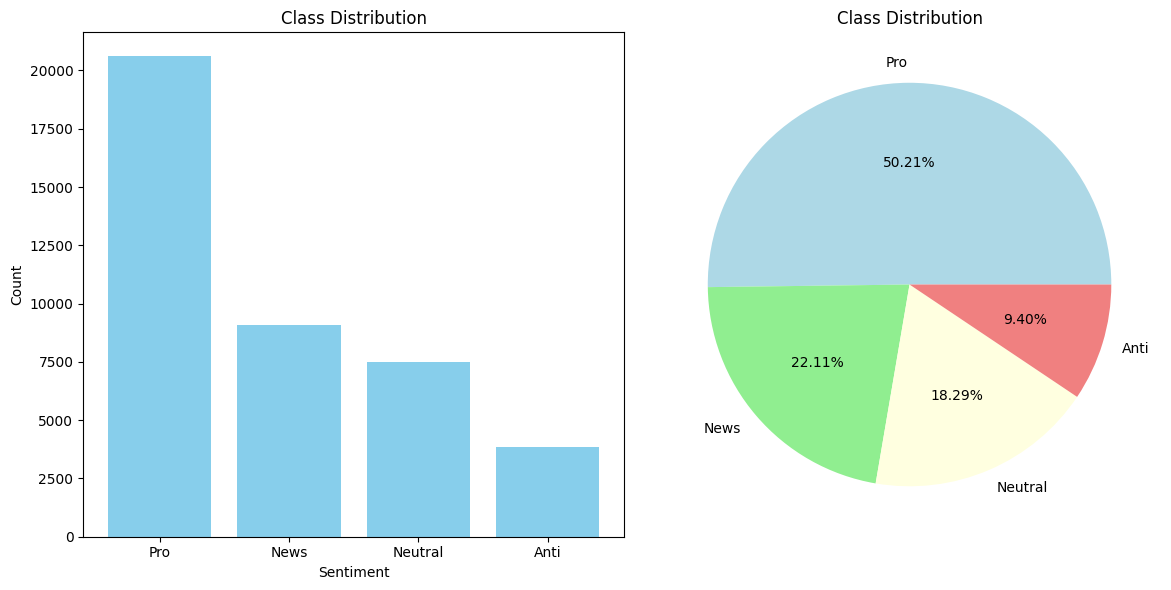

In [10]:
# Plot class distribution
plt.figure(figsize=(12, 6))

# Create left subplot for bar plot
plt.subplot(1, 2, 1)
plt.bar(class_distribution.index, class_distribution['Count'], color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Create right subplot for pie plot
plt.subplot(1, 2, 2)
plt.pie(class_distribution['Count'], labels=class_distribution.index, autopct='%1.2f%%', colors=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

We can notice that amongst this dataset, half of the tweeter messages are classified as **Pro** which means that half of the tweets supports the belief of man-made climate change.

### Extrat the **Handles** to see their impact on the sentiment analysis
A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [11]:
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)

    handles = sum(handles, [])
    frequency = nltk.FreqDist(handles)
    
    handle_df = pd.DataFrame({'handle': list(frequency.keys()), 'count': list(frequency.values())})
    handle_df = handle_df.nlargest(15, columns="count")

    return handle_df

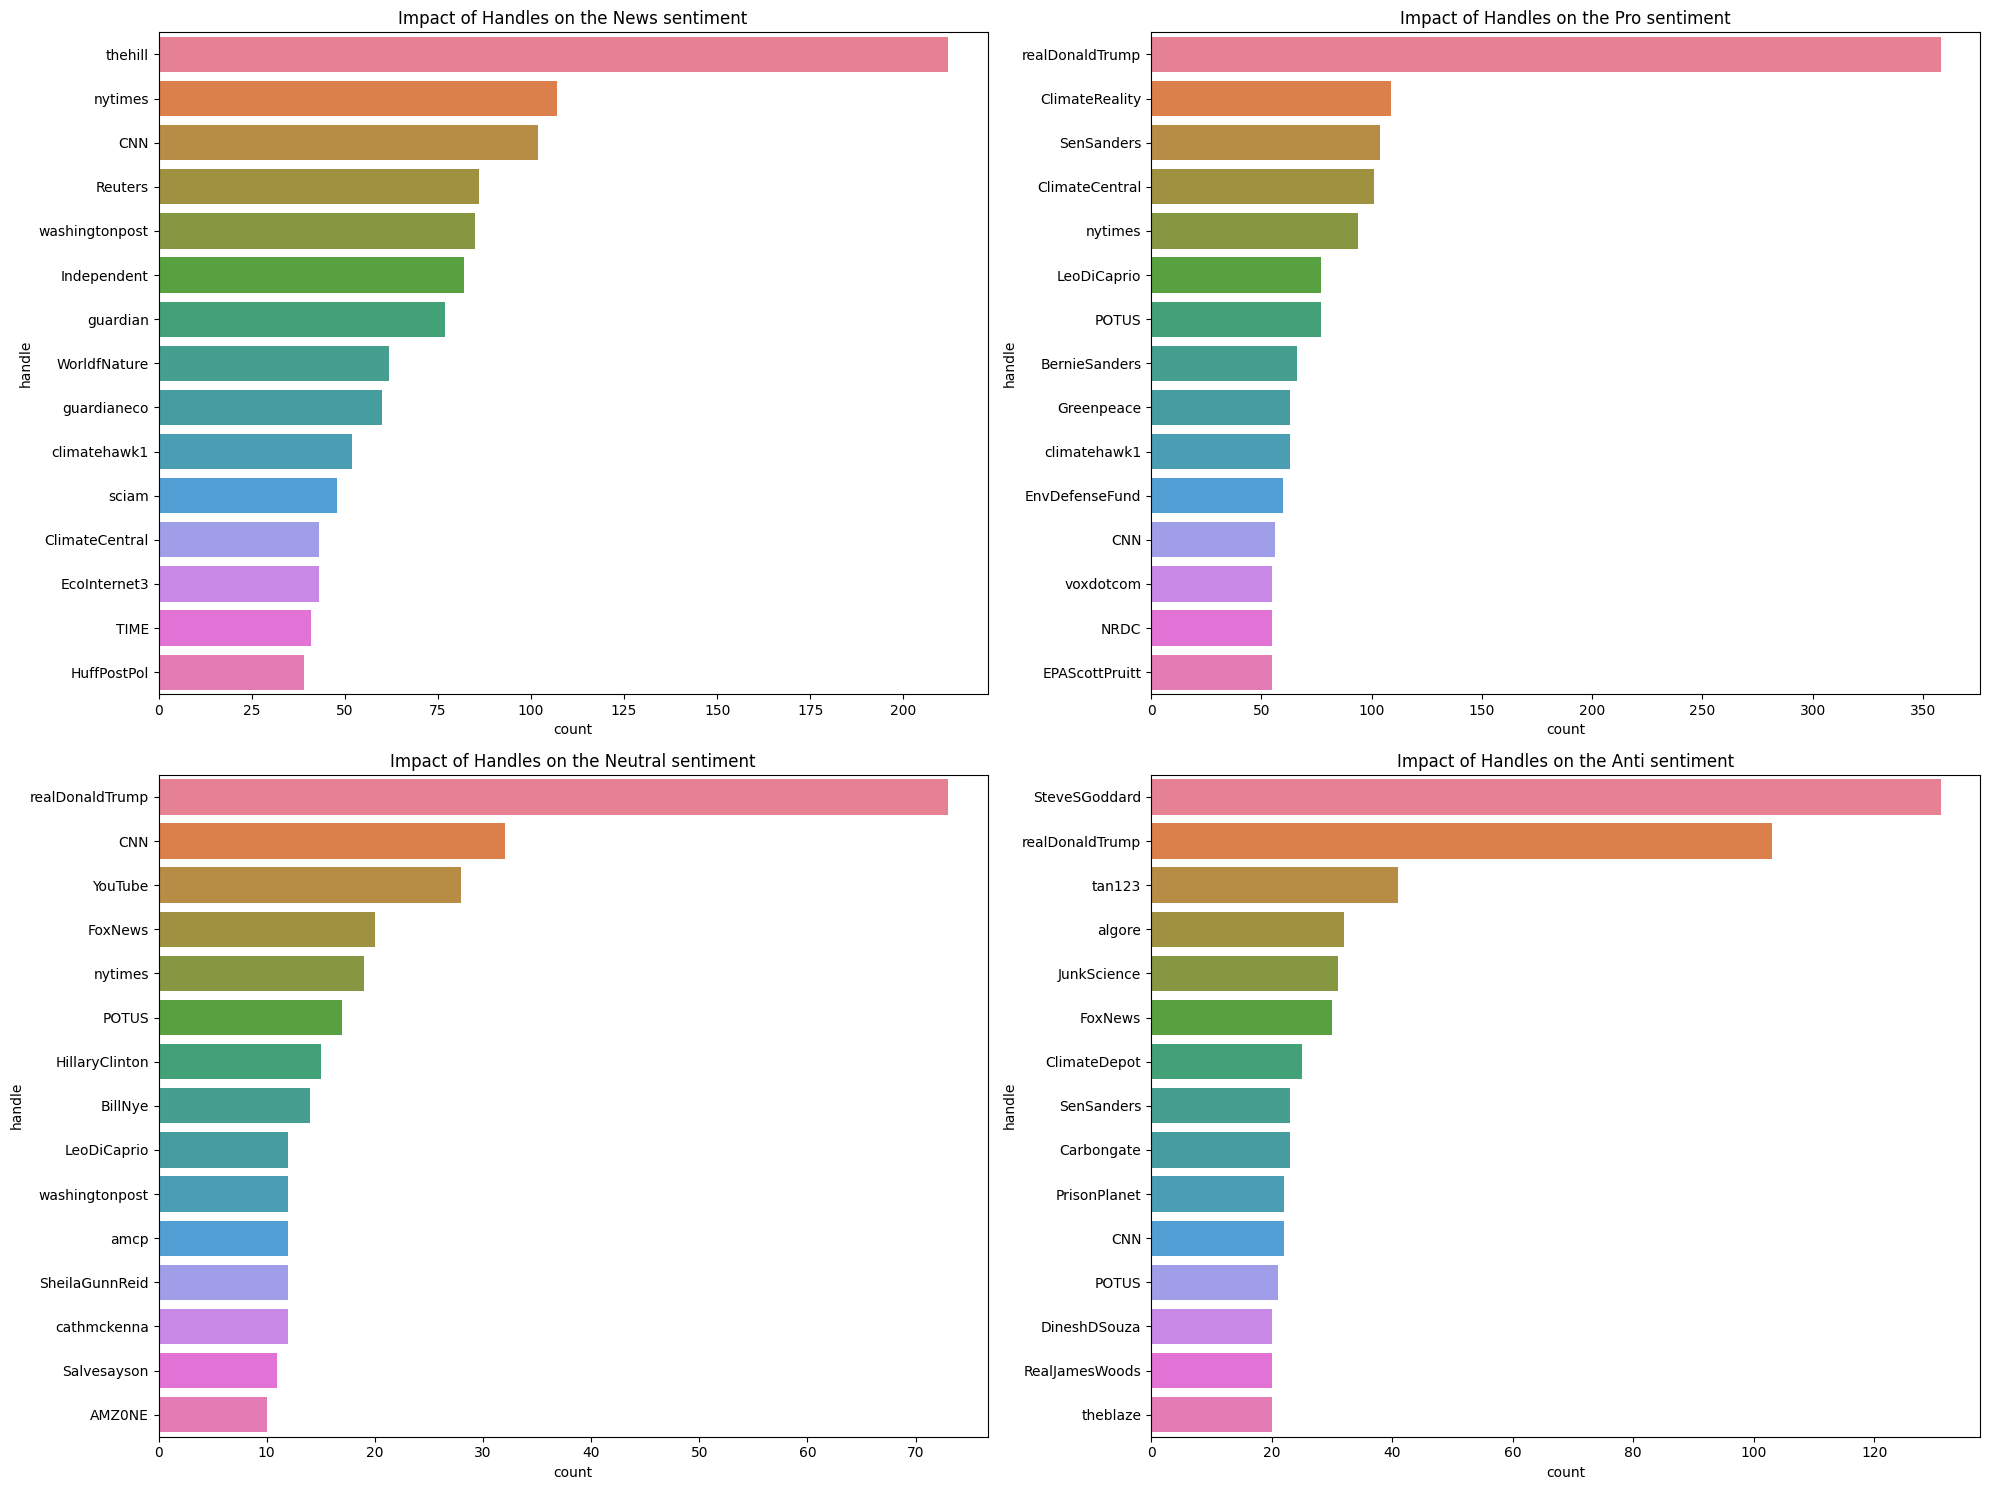

In [12]:
# Extracting handles from tweets
news_handles = extract_handles(df['message'][df['sentiment'] == 2])

pro_handles = extract_handles(df['message'][df['sentiment'] == 1])

neutral_handles = extract_handles(df['message'][df['sentiment'] == 0])

anti_handles = extract_handles(df['message'][df['sentiment'] == -1])

# Visualising the Handles
full_title = ['Impact of Handles on the News sentiment',
              'Impact of Handles on the Pro sentiment',
              'Impact of Handles on the Neutral sentiment',
              'Impact of Handles on the Anti sentiment']


# Barplot of the handles for each category
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, j in enumerate([news_handles, pro_handles, neutral_handles, anti_handles]):
    row = i // 2
    col = i % 2
    sns.barplot(x='count', y='handle', data=j, ax=axes[row, col], palette='husl', hue='handle', legend=False)
    axes[row, col].set_title(full_title[i])
    
plt.tight_layout()
plt.show()

#### **Comments:**

### Extrat **Hashtags** to see their impact on the sentiment analysis

People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet.

In [13]:
def extract_hashtags(x):
    hashtags = []
    for i in x:
        h = re.findall(r'#(\w+)', i)
        hashtags.append(h)

    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()), 'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

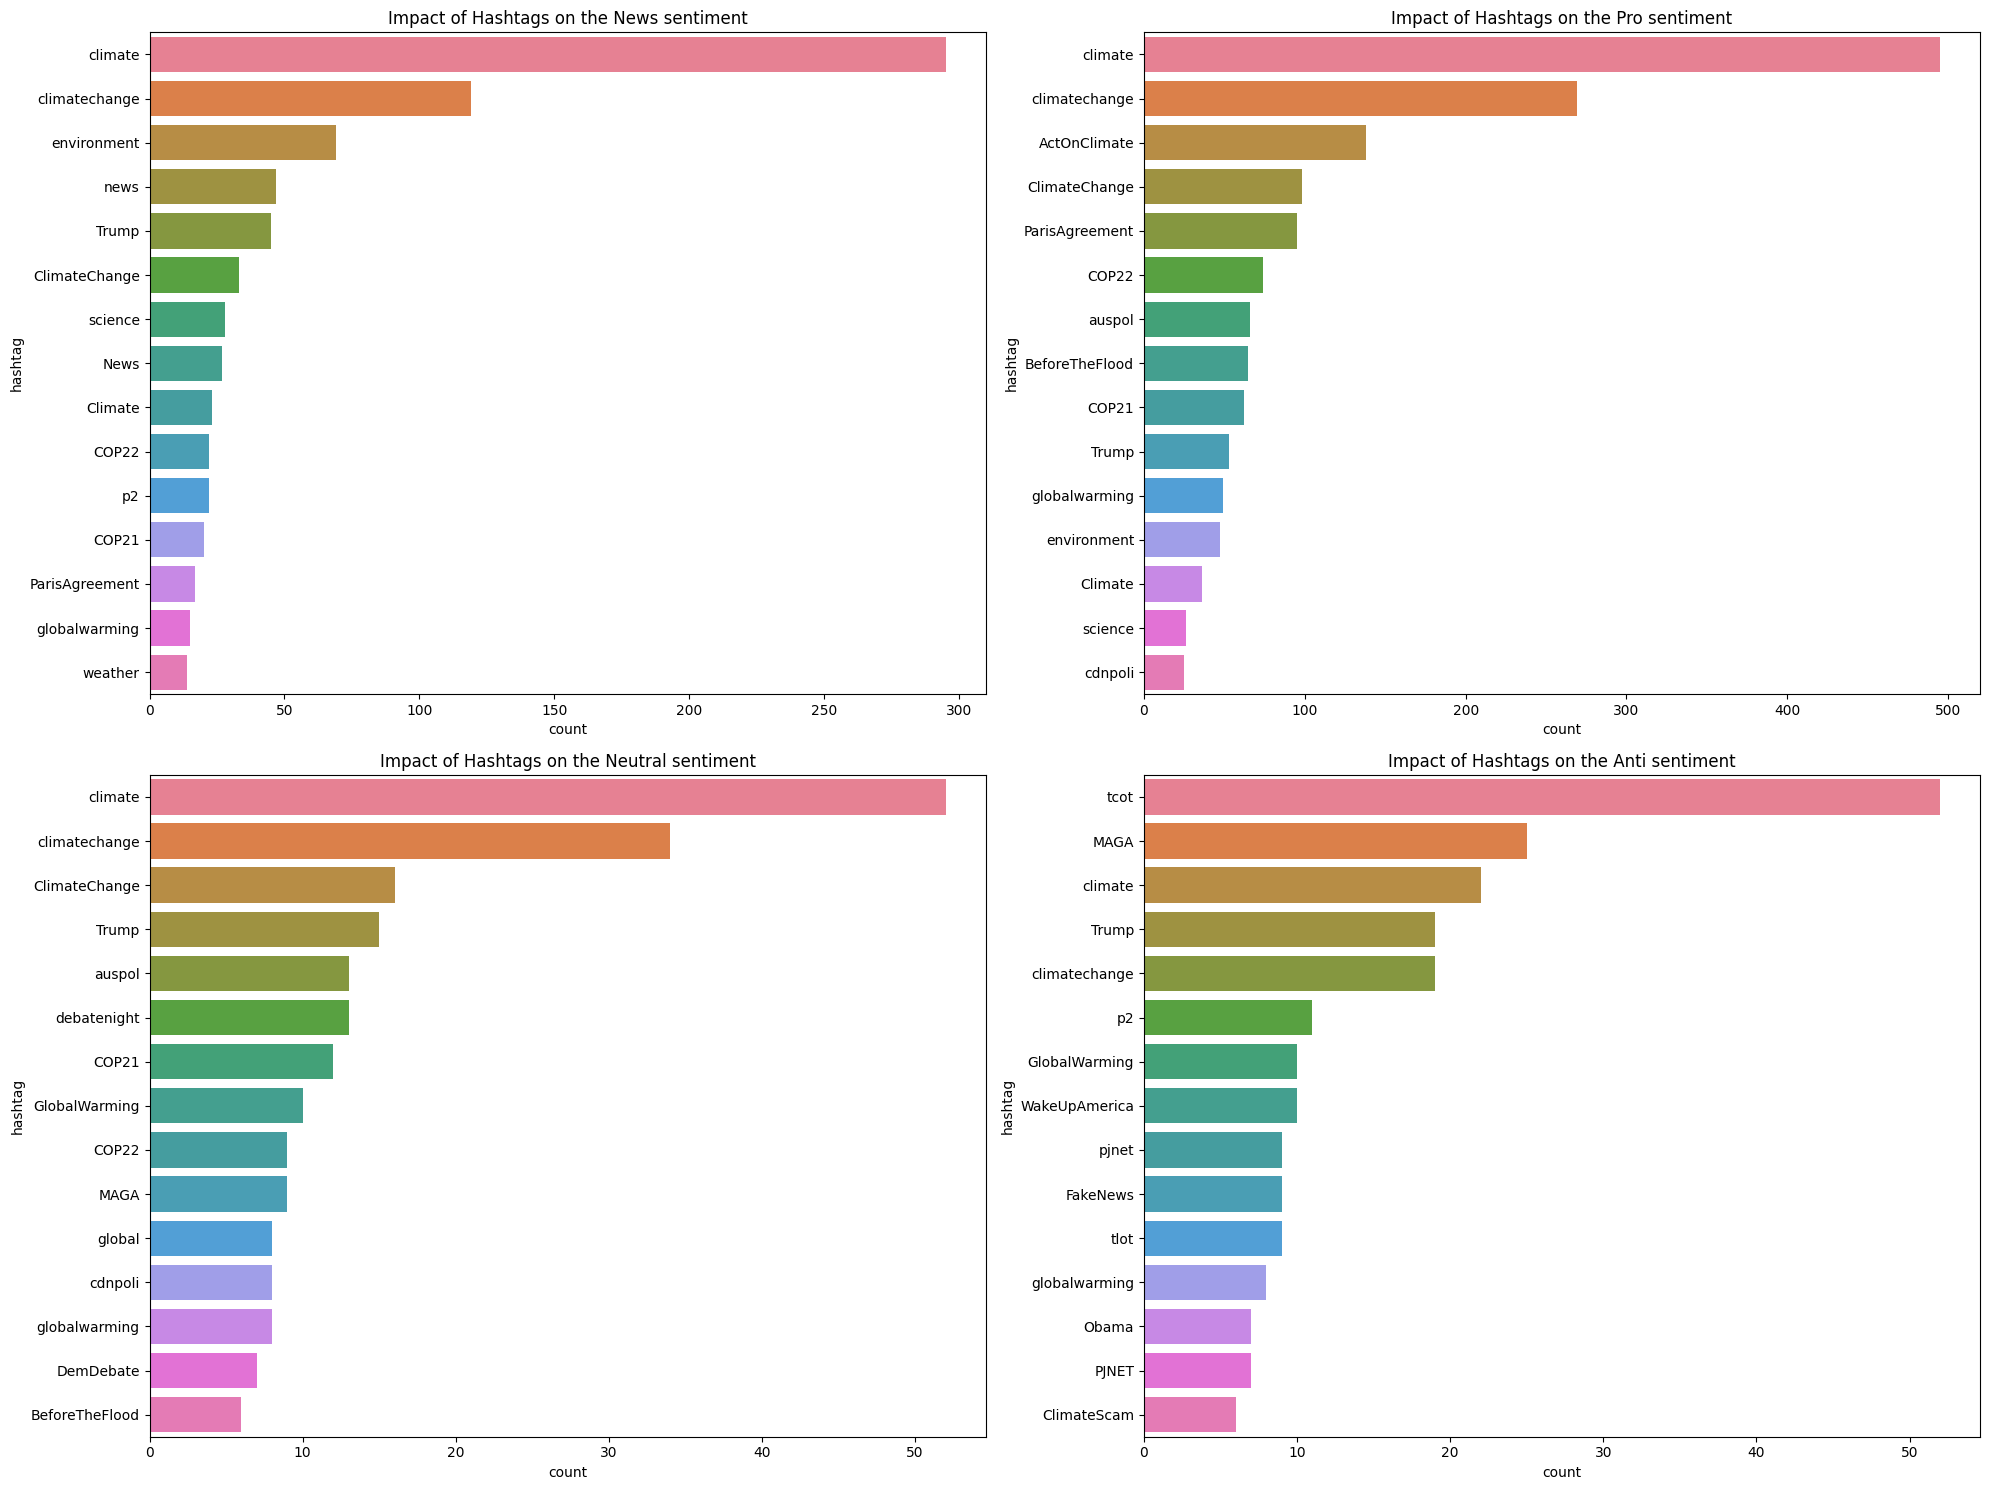

In [14]:
# Extracting hashtags from tweets
news_hashtags = extract_hashtags(df['message'][df['sentiment'] == 2])

pro_hashtags = extract_hashtags(df['message'][df['sentiment'] == 1])

neutral_hashtags = extract_hashtags(df['message'][df['sentiment'] == 0])

anti_hashtags = extract_hashtags(df['message'][df['sentiment'] == -1])

# Visualising the hashtags
full_title = ['Impact of Hashtags on the News sentiment',
              'Impact of Hashtags on the Pro sentiment',
              'Impact of Hashtags on the Neutral sentiment',
              'Impact of Hashtags on the Anti sentiment']


# Barplot of the hashtags for each category
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, j in enumerate([news_hashtags, pro_hashtags, neutral_hashtags, anti_hashtags]):
    row = i // 2
    col = i % 2
    sns.barplot(x='count', y='hashtag', data=j, ax=axes[row, col], palette='husl', hue='hashtag', legend=False)
    axes[row, col].set_title(full_title[i])
    
plt.tight_layout()
plt.show()

## 2. Preprocessing

### Cleaning the tweet messages

Once we've done some EDA on the data, let's clean the tweet messages by removing the unnecessary entities such as *URL's*, *punctuations*, *mentions*, *numbers* and *new lines*. To this end, we will first convert all the letters to lowercase in order to normalize the data, then we remove entities that we don't need. We are going to remove them through [__Regular Expressions (RegEx)__](https://en.wikipedia.org/wiki/Regular_expression). This process uses __meta characters__ to express how to match patterns in text.

The symbol ```\w``` means "any word character" (a, ..., z) and (0, ..., 9). 
```\s``` means a white space. The brackets indicate that we take a set of character.     
```[^ ]``` matches a single character that is not contained within the brackets.   
```*``` indicates zero or more occurrences of the preceding element.   
```+``` matches the preceding element one or more times. For example, ```ab+c``` matches "abc", "abbc", "abbbc", and so on, but not "ac".   
```$``` means the ending position of the string or the position just before a string-ending newline.  

In [28]:
def clean_text(text):

    text = text.lower() # Convert to lowercase
    text = re.sub(r'@\w*', '', text)  # Removing @mentions
    text = re.sub(r'#\w*', '', text)  # Removing #hashtags
    text = re.sub(r'www\.[^\s]+|https?://[^\s]+', '', text)  # Removing hyperlinks
    text = re.sub(r'\n', '', text)  # Removing new line
    text = re.sub(r'\d+', '', text)  # Removing digits
    text = re.sub(r'\W', ' ', text)  # Removing non-word characters (\W is equivalent to [^a-zA-Z0-9_])
    text = re.sub(r'\s+', ' ', text)  # Removing extra spaces
    text = re.sub(r'^\s+|\s+?$', '', text)  # Removing extra spaces at the beginning and the ending
    
    return text


In [30]:
# Create a copy of the dataframe to avoid modifying the original dataframe
tweets = df.copy()

# Apply the clean_text function to the 'message' column
tweets['clean_message'] = tweets['message'].apply(clean_text)

tweets.head()

,sentiment,message,tweetid,clean_message
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change is an interesting hustle as it ...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,rt watch right here as travels the world to ta...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,fabulous leonardo s film on change is brillian...
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,rt just watched this amazing documentary by le...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,rt pranita biswasi a lutheran from odisha give...


### Tokenization

Tokenization corresponds to the process of breaking a larger object into sub-parts, or tokens. In Natural Language Processing, tokens may vary. For instance, one may perform analysis at three levels,

- Character
- Word
- Sentence

The idea is that a sentence is a set of words, and a word is a set of characters. In this sense, the character is the atom of NLP, analogous to pixels in image processing. Nonetheless, NLP usually performs analysis at the level of words. Henceforth, we will mention "tokenization" to the process of breaking chunks of texts into its individual words. We can do so with [NLTK](https://www.nltk.org/), which is an open-source __ensemble__ of libraries, datasets and tutorials written in Python, that also constitutes a single library used in natural language processing. It was originally intended for __educational purposes__.

In [33]:
from nltk.corpus import stopwords

# Remove stopwords
def tweet_tokens(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    
    return filtered_text

In [35]:
# Apply the remove_stopwords function to the 'clean_message' column
tweets['tweet_tokens'] = tweets['clean_message'].apply(tweet_tokens)

tweets.head()


,sentiment,message,tweetid,clean_message,tweet_tokens
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change is an interesting hustle as it ...,"[climate, change, interesting, hustle, global,..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,rt watch right here as travels the world to ta...,"[rt, watch, right, travels, world, tackle, cli..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,fabulous leonardo s film on change is brillian...,"[fabulous, leonardo, film, change, brilliant, ..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,rt just watched this amazing documentary by le...,"[rt, watched, amazing, documentary, leonardodi..."
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,rt pranita biswasi a lutheran from odisha give...,"[rt, pranita, biswasi, lutheran, odisha, gives..."


### Stemming and Lemmatization 

**Stemming** and **lemmatization** are techniques used in NLP to reduce words to their base or root form. The main difference between the two is that stemming simply chops off the ends of words to remove prefixes and suffixes, while lemmatization considers the context and meaning of words to convert them to their dictionary form.

- ```Stemming``` involves applying a set of rules to remove common word endings, such as "-s", "-ing", or "-ed". For example, the word "running" would be stemmed to "run". Stemming is a simpler and faster process compared to lemmatization, but it may result in the loss of the original word's meaning.

- ```Lemmatization```, on the other hand, uses more advanced techniques to determine the base form of a word based on its part of speech and context. It takes into account the morphological analysis of words and uses a dictionary or vocabulary to map words to their base form. For example, the word "running" would be lemmatized to "run".

In sentiment analysis, the goal is to determine the sentiment or emotion expressed in a text. Stemming is generally not recommended for sentiment analysis because it can lead to the loss of important information and context. Stemming may change the meaning of words and can result in incorrect sentiment classification. Lemmatization, on the other hand, preserves the original meaning of words and is more suitable for sentiment analysis tasks.

By using lemmatization, we can ensure that sentiment analysis models have access to the correct base forms of words, which helps in capturing the intended sentiment accurately.

In [36]:
def lemmatize_text(text):

    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    
    return lemmatized_text

In [40]:
# Apply the lemmatize_text function to the 'tweet_tokens' column
tweets['lemmatized_tweet'] = tweets['tweet_tokens'].apply(lemmatize_text)
tweets.head()

,sentiment,message,tweetid,clean_message,tweet_tokens,lemmatized_tweet
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change is an interesting hustle as it ...,"[climate, change, interesting, hustle, global,...","[climate, change, interesting, hustle, global,..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,rt watch right here as travels the world to ta...,"[rt, watch, right, travels, world, tackle, cli...","[rt, watch, right, travel, world, tackle, clim..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,fabulous leonardo s film on change is brillian...,"[fabulous, leonardo, film, change, brilliant, ...","[fabulous, leonardo, film, change, brilliant, ..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,rt just watched this amazing documentary by le...,"[rt, watched, amazing, documentary, leonardodi...","[rt, watched, amazing, documentary, leonardodi..."
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,rt pranita biswasi a lutheran from odisha give...,"[rt, pranita, biswasi, lutheran, odisha, gives...","[rt, pranita, biswasi, lutheran, odisha, give,..."
